### K-means亚洲国家队聚类

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

# 需要将亚洲国家队，分成三个类别:甲乙丙
# 只有历年的统计数据，没有目标值（类别，等级）
data = pd.read_csv('./AsiaFootball.txt')
data

,国家,2006年世界杯,2010年世界杯,2007亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


In [2]:
X = data.iloc[:,1:]
X

,2006年世界杯,2010年世界杯,2007亚洲杯
0,50,50,9
1,28,9,4
2,17,15,3
3,25,40,5
4,28,40,2
5,50,50,1
6,50,40,9
7,50,40,9
8,40,40,5
9,50,50,9


In [4]:
model = KMeans(n_clusters=3)
model.fit(X)# 无监督学习
y_ = model.predict(X)
y_
for i in range(3):
    cond = y_ == i
    print(i,data[cond]['国家'].values)

0 ['伊朗' '沙特' '乌兹别克斯坦' '巴林' '朝鲜']
1 ['中国' '伊拉克' '卡塔尔' '阿联酋' '泰国' '越南' '阿曼' '印尼']
2 ['日本' '韩国']


In [7]:
model = KMeans(n_clusters=3)
model.fit(X)# 无监督学习
y_ = model.predict(X)
y_
for i in range(3):
    cond = y_ == i
    print(i,data[cond]['国家'].values)

0 ['伊朗' '沙特' '乌兹别克斯坦' '巴林' '朝鲜']
1 ['日本' '韩国']
2 ['中国' '伊拉克' '卡塔尔' '阿联酋' '泰国' '越南' '阿曼' '印尼']


### K只选择

In [16]:
from matplotlib.font_manager import FontManager
fm = FontManager()
[font.name for font in fm.ttflist]

['STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'cmsy10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'cmr10',
 'cmb10',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'cmmi10',
 'cmss10',
 'DejaVu Sans Mono',
 'cmtt10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'STIXSizeOneSym',
 'cmex10',
 'STIXSizeFiveSym',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'Agency FB',
 'Elephant',
 'MS Outlook',
 'Microsoft YaHei',
 'Book Antiqua',
 'Segoe UI Variable',
 'Dubai',
 'Franklin Gothic Demi',
 'Microsoft PhagsPa',
 'Arial',
 'Javanese Text',
 'Mistral',
 'Lucida Sans Unicode',
 'Palatino Linotype',
 'DejaVu Sans Mono',
 'Microsoft Sans Serif',
 'Castellar',
 'LiSu',
 'Trebuchet MS',
 'Wingdings 

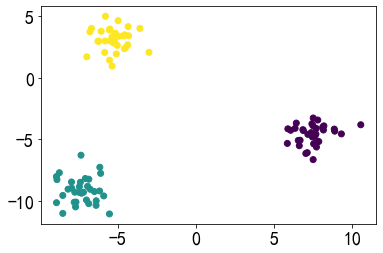

In [15]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# 聚类：轮廓系数，对聚类的评价指标，对应数学公式
from sklearn.metrics import silhouette_score

# 创建数据
# 假数据，数据X划分成3类
X,y = datasets.make_blobs(centers=3,random_state=128)
plt.scatter(X[:,0],X[:,1],c = y)

# 指定不同的k，寻找最佳聚类类别数目
# 可以画图，一目了然，数据简单，属性只有两个，所以可以画图
# 属性多，无法可视化，评价指标
# 轮廓系数
plt.rcParams['font.sans-serif'] = 'KaiTi'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.unicode_minus'] = False # 显示负号

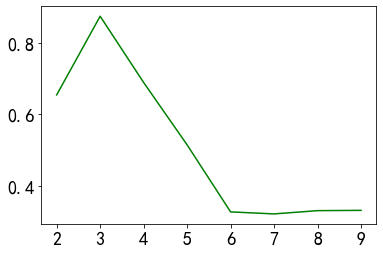

In [19]:
scores = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    score = silhouette_score(X,model.predict(X))
    scores.append(score)

plt.plot(np.arange(2,10),scores,color = 'green')
_ = plt.xticks(np.arange(2,10))

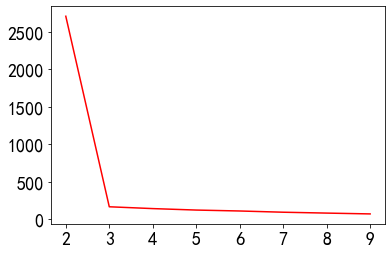

In [20]:
inertia = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertia.append(model.inertia_) # 最陡峭的k值，就是合适的聚类个数

plt.plot(np.arange(2,10),inertia,color = 'red')
_ = plt.xticks(np.arange(2,10))

### K-means图片像素特征提取

(128, 128, 3)
(16384, 3)


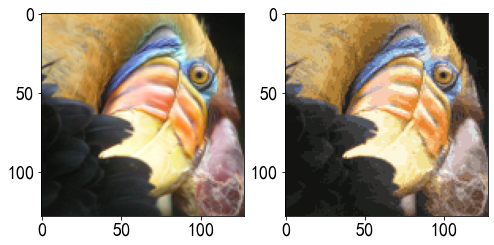

In [32]:
import matplotlib.pyplot as plt # plt 用于显示图片
from sklearn.cluster import KMeans
import numpy as np
plt.figure(figsize=(8,4))

# 加载图片显示原图
pixel = plt.imread('bird.png')
plt.subplot(1,2,1)
plt.imshow(pixel)
print(pixel.shape)

# 聚类运算，压缩图片
X = pixel.reshape((128*128 , 3))
print(X.shape)# 16384个像素，3个值

model = KMeans(n_clusters=32)
model.fit(X)
y_ = model.predict(X) # y_每个像素的标记，label=0、1、2……、7

# 每个簇，都会有簇中心，代表这一簇
cc = model.cluster_centers_ # 8个簇中心
new_image = cc[y_] # NumPy高级用法，根据y_顺序，从cc中取数据，长度16384，新图片
new_image = new_image.reshape(128,128,3)

plt.subplot(1,2,2)
plt.imshow(new_image)

In [26]:
# 不同的像素值
np.unique(X,axis = 0).shape

(13930, 3)

### DBSCAN算法实战

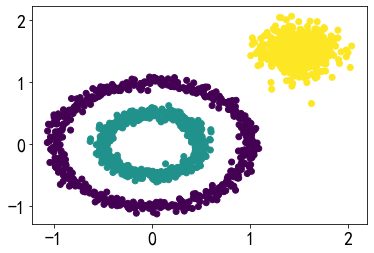

In [33]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt

# y中是两类：0,1
X,y = datasets.make_circles(n_samples=1000,noise=0.05,factor = 0.5)

# centers = [(1.5,1.5)] 元组，代表着，中心点的坐标值
# y1一类：0 + 2
X1,y1 = datasets.make_blobs(n_samples=500,n_features=2,centers=[(1.5,1.5)],cluster_std=0.2)

# 将circle和散点进行了数据合并
X = np.concatenate([X,X1])
y = np.concatenate([y,y1 + 2])
plt.scatter(X[:,0],X[:,1],c = y)

#### Kmeans算法使用

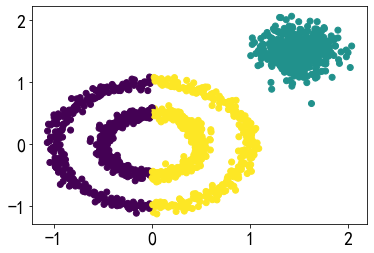

In [34]:
model = KMeans(3)
model.fit(X)
y_ = model.predict(X)
plt.scatter(X[:,0],X[:,1],c = y_)

#### DBSCAN

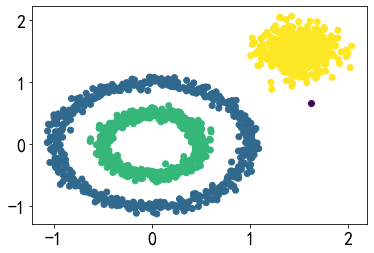

In [40]:
model = DBSCAN(eps = 0.2,min_samples=3)
model.fit(X)
y_ = model.labels_# 标签，预测值
plt.scatter(X[:,0],X[:,1],c = y_)

In [39]:
np.unique(y_)

array([-1,  0,  1,  2], dtype=int64)

### 分层聚类

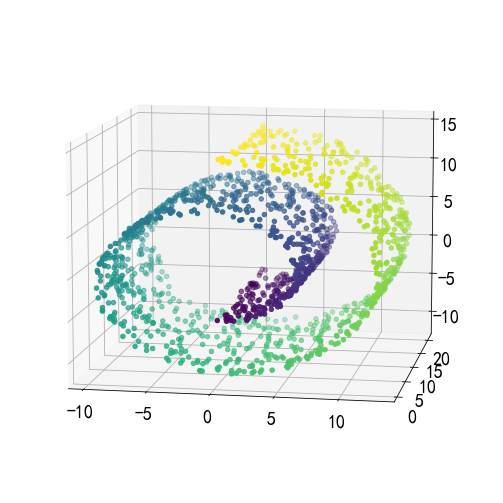

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.datasets import make_swiss_roll

X,y = datasets.make_swiss_roll(n_samples=1500,noise = 0.05)

fig = plt.figure(figsize=(12,9))
a3 = fig.add_subplot(projection = '3d')
a3.scatter(X[:,0],X[:,1],X[:,2],c = y)
a3.view_init(10,-80) # 调整观察视角

#### Kmeans应用于层次结构

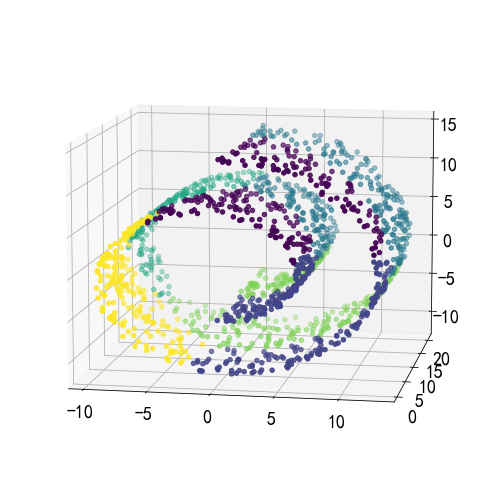

In [43]:
model = KMeans(6)
model.fit(X)

y_ = model.labels_

fig = plt.figure(figsize=(12,9))
a3 = fig.add_subplot(projection = '3d')
a3.scatter(X[:,0],X[:,1],X[:,2],c = y_)
a3.view_init(10,-80) # 调整观察视角

#### 分层聚类应用

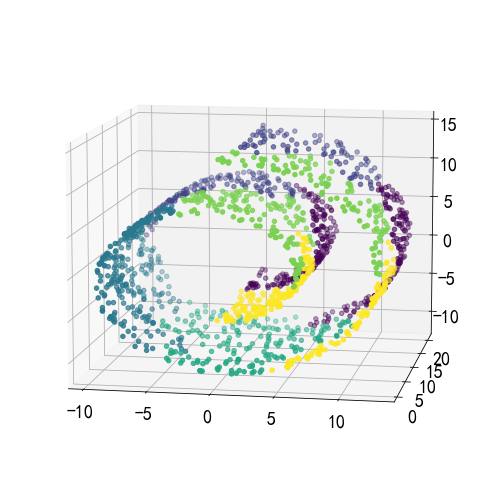

In [44]:
model = AgglomerativeClustering(n_clusters=6,linkage='ward')
model.fit(X)
y_ = model.labels_
fig = plt.figure(figsize=(12,9))
a3 = fig.add_subplot(projection = '3d')
a3.scatter(X[:,0],X[:,1],X[:,2],c = y_)
a3.view_init(10,-80) # 调整观察视角

#### 带约束的分层聚类

In [45]:
from sklearn.neighbors import kneighbors_graph

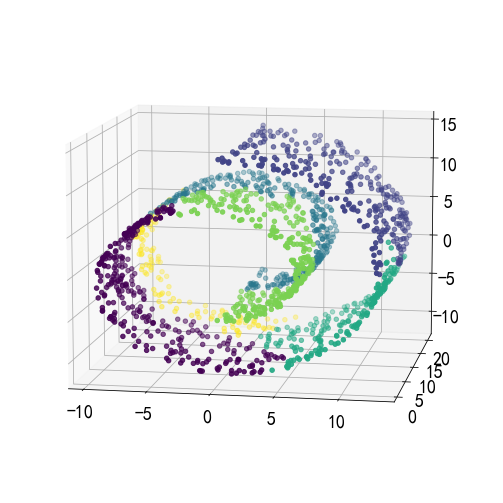

In [48]:
conn = kneighbors_graph(X,n_neighbors=5)
model = AgglomerativeClustering(n_clusters=6,linkage='ward',connectivity=conn)
model.fit(X)
y_ = model.labels_
fig = plt.figure(figsize=(12,9))
a3 = fig.add_subplot(projection = '3d')
a3.scatter(X[:,0],X[:,1],X[:,2],c = y_)
a3.view_init(10,-80) # 调整观察视角